<center><h1>Hong_Seungil_HW5</h1></center>
<br>
<br>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093 

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.tree import _tree
from sklearn import tree
from sklearn.preprocessing import MultiLabelBinarizer


### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
df_raw = pd.read_csv('../data/diagnosis.data', sep='\s+', encoding='UTF_16', header=None, decimal=',')
df_raw.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]
print(df_raw)

       a1   a2   a3   a4   a5   a6   d1   d2
0    35.5   no  yes   no   no   no   no   no
1    35.9   no   no  yes  yes  yes  yes   no
2    35.9   no  yes   no   no   no   no   no
3    36.0   no   no  yes  yes  yes  yes   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes   no  yes
116  41.5   no   no   no   no   no   no   no
117  41.5  yes  yes   no  yes   no   no  yes
118  41.5   no  yes  yes   no  yes   no  yes
119  41.5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]


### (b) Build a decision tree

In [23]:
# Encode Yes=1, No=0
label_encoders = {}
for column in df_raw.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_raw[column] = le.fit_transform(df_raw[column])
    label_encoders[column] = le

# Split data
X = df_raw.drop(['d1', 'd2'], axis=1)  # Target Variables
X

,a1,a2,a3,a4,a5,a6
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


DECISION TREE for 'd1'
|--- a4 <= 0.50
|   |--- class: 0
|--- a4 >  0.50
|   |--- a5 <= 0.50
|   |   |--- a6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- a6 >  0.50
|   |   |   |--- class: 0
|   |--- a5 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.875, 'x[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'x[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'x[5] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

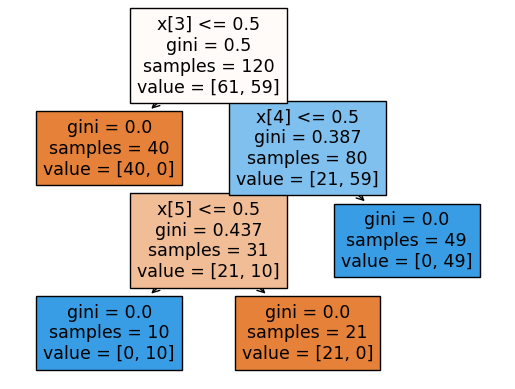

In [34]:
y = df_raw['d1']  # Change d1 or d2

# Build decision tree
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X, y)

# Visualize the decision tree (text-based representation)
r_d1 = export_text(clf1, feature_names=list(X.columns))
print("DECISION TREE for 'd1'")
print(r_d1)
tree.plot_tree(clf1, filled=True)

DECISION TREE for 'd2'
|--- a1 <= 37.95
|   |--- class: 0
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

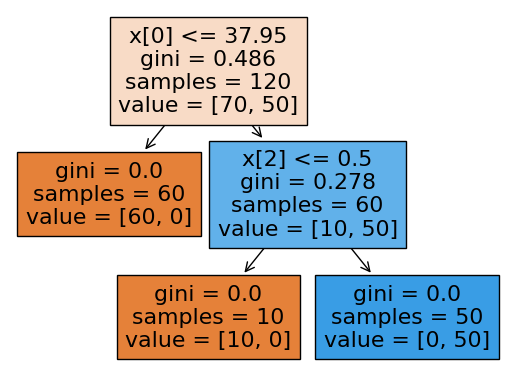

In [35]:
y = df_raw['d2']  # Change d1 or d2

# Build decision tree
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X, y)

# Visualize the decision tree (text-based representation)
r_d2 = export_text(clf2, feature_names=list(X.columns))
print("DECISION TREE for 'd2'")
print(r_d2)
tree.plot_tree(clf2, filled=True)

> The Gini impurity gives a measure of "disorder" in a set. 
>* A Gini impurity of 0 indicates that the set is "pure" and contains only one class.
>* A higher Gini impurity value indicates a more disordered set.

> To use Powerset labels. This is Multi label problem so using powerset is more interpretable. 

DECISION TREE for multi-label classification
|--- a1 <= 37.95
|   |--- a4 <= 0.50
|   |   |--- class: 0
|   |--- a4 >  0.50
|   |   |--- class: 1
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- a2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- a2 >  0.50
|   |   |   |--- a4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- a4 >  0.50
|   |   |   |   |--- class: 0



[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

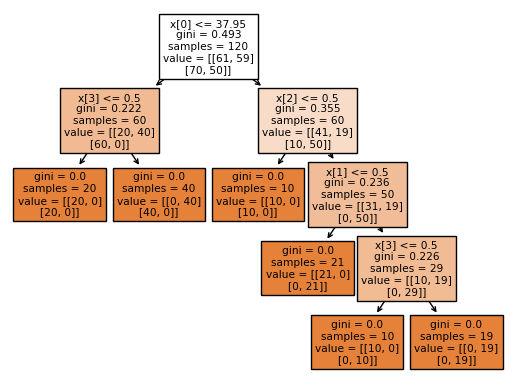

In [36]:
# 1. Label Combination for powerset
y_multi = df_raw[['d1', 'd2']]

# 2. Training the Classifier
clf_multi = DecisionTreeClassifier(random_state=42)
clf_multi.fit(X, y_multi)

# 3. Visualize the decision tree
print("DECISION TREE for multi-label classification")
r_multi = export_text(clf_multi, feature_names=list(X.columns))
print(r_multi)
plot_tree(clf_multi, filled=True)

### (c) Convert the decision rules

In [37]:
def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode
    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as pseudocode
    feature_names: list
    The feature names of the dataset used for building the decision tree
    '''
    
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [33]:
tree_to_code(clf_multi, df_raw.columns[0:6])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a2 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a2 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

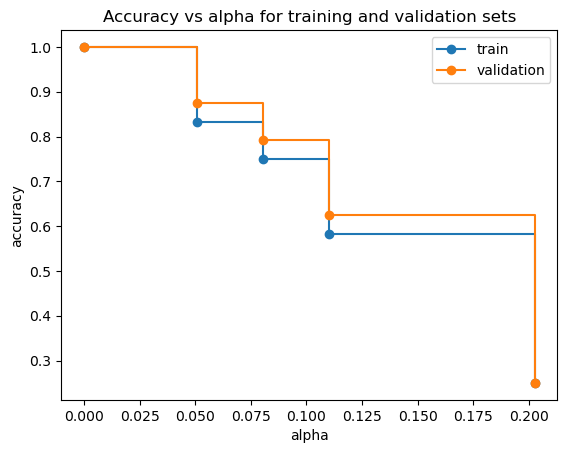

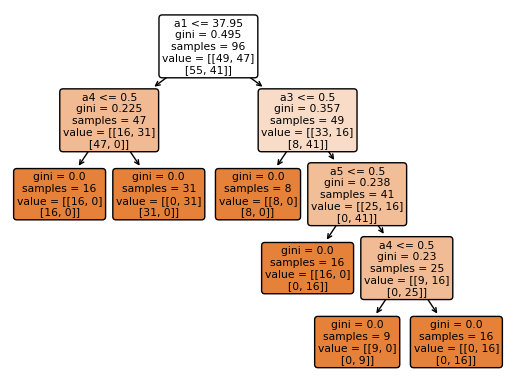

In [52]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_multi, test_size=0.20, random_state=42)

# 1. Train the initial tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 2. Determine the pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 3. Train decision trees using different values of alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 4. Evaluate the performance of the trees on validation data
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

# Visualize the accuracy of trees as alpha changes
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

# Find the best tree based on validation accuracy
max_val_accuracy_index = val_scores.index(max(val_scores))
best_clf = clfs[max_val_accuracy_index]

# 5. Visualize the selected tree
plt.figure()
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

### (b) Missing values

### (c) Plot a correlation matrix

### (d) Calculate the Coefficient of Variation CV

### (e) Scatter plots and box plots for highest CV features

### (f) Fit a linear model

### (g) Fit a ridge regression model

### (h) Fit a LASSO model

### (i) Fit a PCR model

### (j) Fit a boosting tree